In [58]:
'''

Plotting metrics of finger flexion predicted by transformer encoder
@author: Deng Chijun
@create date: 2024.11.28

'''
import logging
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

vlag = sns.color_palette("vlag", as_cmap=True)
warm_vlag = vlag(np.linspace(0.5, 1, 256)) 
warm_vlag = LinearSegmentedColormap.from_list("warm_vlag", warm_vlag)

cool_vlag = vlag(np.linspace(0, 0.5, 256)) 
cool_vlag = LinearSegmentedColormap.from_list("cool_vlag", cool_vlag)


In [2]:
# Preprocessed data directory (feature)
root_dir = "/Users/miaolab/Desktop/dengchijun/coursework/bci"

# Results directory
pred_dir = f"{root_dir}/BCI-Finger-Flex/prediction/transformer"

In [8]:
'''
Loading results
'''
subs = [1, 2, 3]
fingers = ['thumb', 'index', 'middle', 'ring', 'little']

rho_matrix = np.zeros((len(subs), len(fingers)))
mse_matrix = np.zeros((len(subs), len(fingers)))

for idx, subid in enumerate(subs):
    pred_finger_dir = f"{pred_dir}/sub{subid}"
    
    for finger_id, finger_name in enumerate(fingers):
        with open(f"{pred_finger_dir}/{finger_name}.pkl", 'rb') as pickle_file:
            pred_res = pickle.load(pickle_file)
        rho_matrix[idx, finger_id] = pred_res['rho']
        mse_matrix[idx, finger_id] = pred_res['mse']


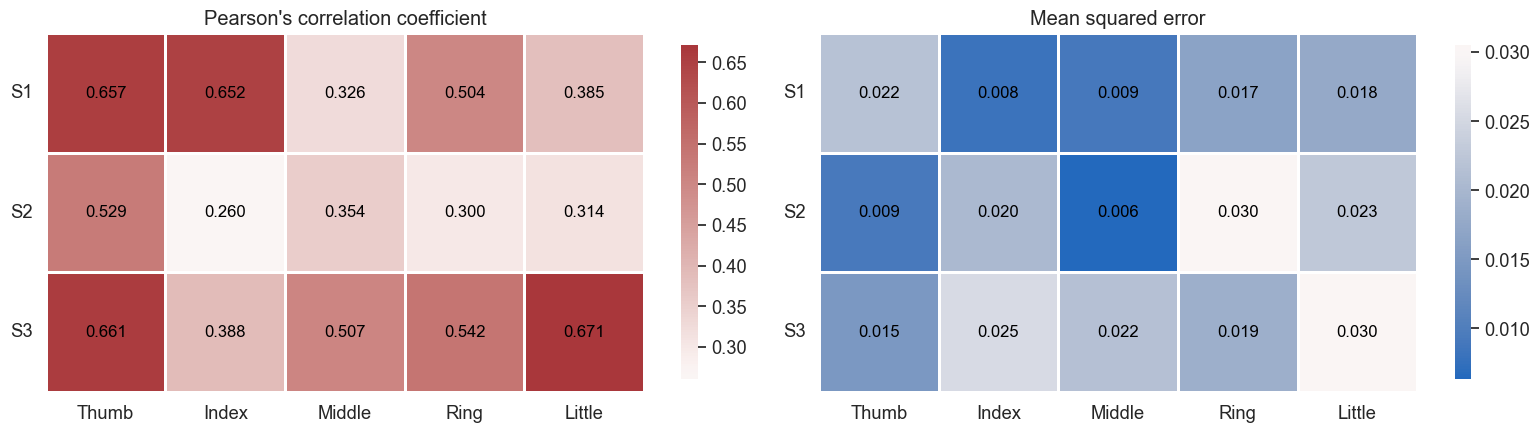

In [71]:
'''
PLot results
'''

xticklabels = [s.title() for s in fingers]
yticklabels = [f"S{s}" for s in subs]
title = ["Pearson's correlation coefficient", 'Mean squared error']
cmaps = [warm_vlag, cool_vlag]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, data in enumerate([rho_matrix, mse_matrix]):
    # Plotting the heatmap
    sns.set_theme(style='darkgrid', font_scale=1.2)
    ax_rho = sns.heatmap(
                        data,
                        xticklabels=xticklabels,
                        yticklabels=yticklabels,
                        cmap=cmaps[idx],       
                        square=True,           
                        linewidths=2,       
                        linecolor='white',  
                        annot=True,
                        fmt=".3f",
                        annot_kws={"size": 12, "color": "black"}, 
                        cbar_kws={"shrink":0.6},
                        ax=axes[idx]
                        )
    axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=0) 
    axes[idx].set_title(title[idx])
plt.tight_layout()  
# Save figure
plt.savefig(f"{pred_dir}/pred_metrics.png", bbox_inches='tight', dpi=300)
plt.show()